# Kaggle CarDekho Data

Las bases de datos empleadas para este proyecto se puede descargar en el siguiente link https://www.kaggle.com/datasets/nehalbirla/vehicle-dataset-from-cardekho

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectPercentile
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import GridSearchCV

In [2]:
df = pd.read_csv("Car details v3.csv")

## EXPLORATORY DATA ANALYSIS

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   mileage        7907 non-null   object 
 9   engine         7907 non-null   object 
 10  max_power      7913 non-null   object 
 11  torque         7906 non-null   object 
 12  seats          7907 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 825.6+ KB


In [4]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


In [5]:
df1 = pd.read_csv("CAR DETAILS FROM CAR DEKHO.csv")

In [6]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4340 non-null   object
 1   year           4340 non-null   int64 
 2   selling_price  4340 non-null   int64 
 3   km_driven      4340 non-null   int64 
 4   fuel           4340 non-null   object
 5   seller_type    4340 non-null   object
 6   transmission   4340 non-null   object
 7   owner          4340 non-null   object
dtypes: int64(3), object(5)
memory usage: 271.4+ KB


In [7]:
df1.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [8]:
df2 = pd.read_csv("car data.csv")

In [9]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [10]:
df2.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [11]:
df.describe()

,year,selling_price,km_driven,seats
count,8128.000000,8.128000e+03,8.128000e+03,7907.000000
mean,2013.804011,6.382718e+05,6.981951e+04,5.416719
std,4.044249,8.062534e+05,5.655055e+04,0.959588
min,1983.000000,2.999900e+04,1.000000e+00,2.000000
25%,2011.000000,2.549990e+05,3.500000e+04,5.000000
50%,2015.000000,4.500000e+05,6.000000e+04,5.000000
75%,2017.000000,6.750000e+05,9.800000e+04,5.000000
max,2020.000000,1.000000e+07,2.360457e+06,14.000000


In [12]:
df1.describe()

,year,selling_price,km_driven
count,4340.000000,4.340000e+03,4340.000000
mean,2013.090783,5.041273e+05,66215.777419
std,4.215344,5.785487e+05,46644.102194
min,1992.000000,2.000000e+04,1.000000
25%,2011.000000,2.087498e+05,35000.000000
50%,2014.000000,3.500000e+05,60000.000000
75%,2016.000000,6.000000e+05,90000.000000
max,2020.000000,8.900000e+06,806599.000000


In [13]:
df2.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [14]:
df["year"].unique()

array([2014, 2006, 2010, 2007, 2017, 2001, 2011, 2013, 2005, 2009, 2016,
       2012, 2002, 2015, 2018, 2003, 2019, 2008, 2020, 1999, 2000, 1983,
       2004, 1996, 1994, 1995, 1998, 1997, 1991])

In [15]:
df["fuel"].unique()

array(['Diesel', 'Petrol', 'LPG', 'CNG'], dtype=object)

In [16]:
df["seller_type"].unique()

array(['Individual', 'Dealer', 'Trustmark Dealer'], dtype=object)

In [17]:
df["transmission"].unique()

array(['Manual', 'Automatic'], dtype=object)

In [18]:
df["owner"].unique()

array(['First Owner', 'Second Owner', 'Third Owner',
       'Fourth & Above Owner', 'Test Drive Car'], dtype=object)

In [19]:
df1["year"].unique()

array([2007, 2012, 2017, 2014, 2016, 2015, 2018, 2019, 2013, 2011, 2010,
       2009, 2006, 1996, 2005, 2008, 2004, 1998, 2003, 2002, 2020, 2000,
       1999, 2001, 1995, 1997, 1992])

In [20]:
df1["fuel"].unique()

array(['Petrol', 'Diesel', 'CNG', 'LPG', 'Electric'], dtype=object)

In [21]:
df1["seller_type"].unique()

array(['Individual', 'Dealer', 'Trustmark Dealer'], dtype=object)

In [22]:
df1["transmission"].unique()

array(['Manual', 'Automatic'], dtype=object)

In [23]:
df1["owner"].unique()

array(['First Owner', 'Second Owner', 'Fourth & Above Owner',
       'Third Owner', 'Test Drive Car'], dtype=object)

In [24]:
df2["Year"].unique()

array([2014, 2013, 2017, 2011, 2018, 2015, 2016, 2009, 2010, 2012, 2003,
       2008, 2006, 2005, 2004, 2007])

In [25]:
df2["Fuel_Type"].unique()

array(['Petrol', 'Diesel', 'CNG'], dtype=object)

In [26]:
df2["Seller_Type"].unique()

array(['Dealer', 'Individual'], dtype=object)

In [27]:
df2["Transmission"].unique()

array(['Manual', 'Automatic'], dtype=object)

In [28]:
df2["Owner"].unique()

array([0, 1, 3])

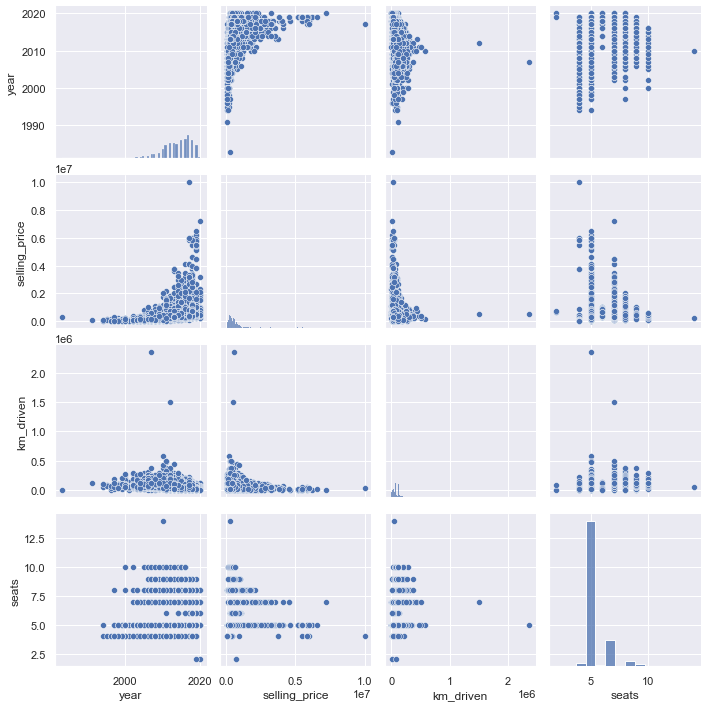

In [29]:
# Graficamos
sns.set()
sns.pairplot(df);

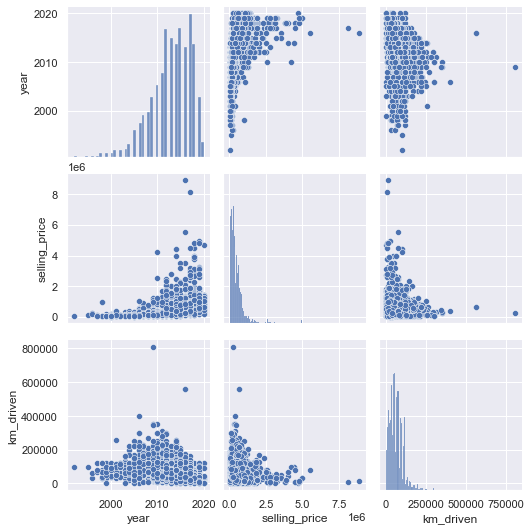

In [30]:
sns.pairplot(df1);

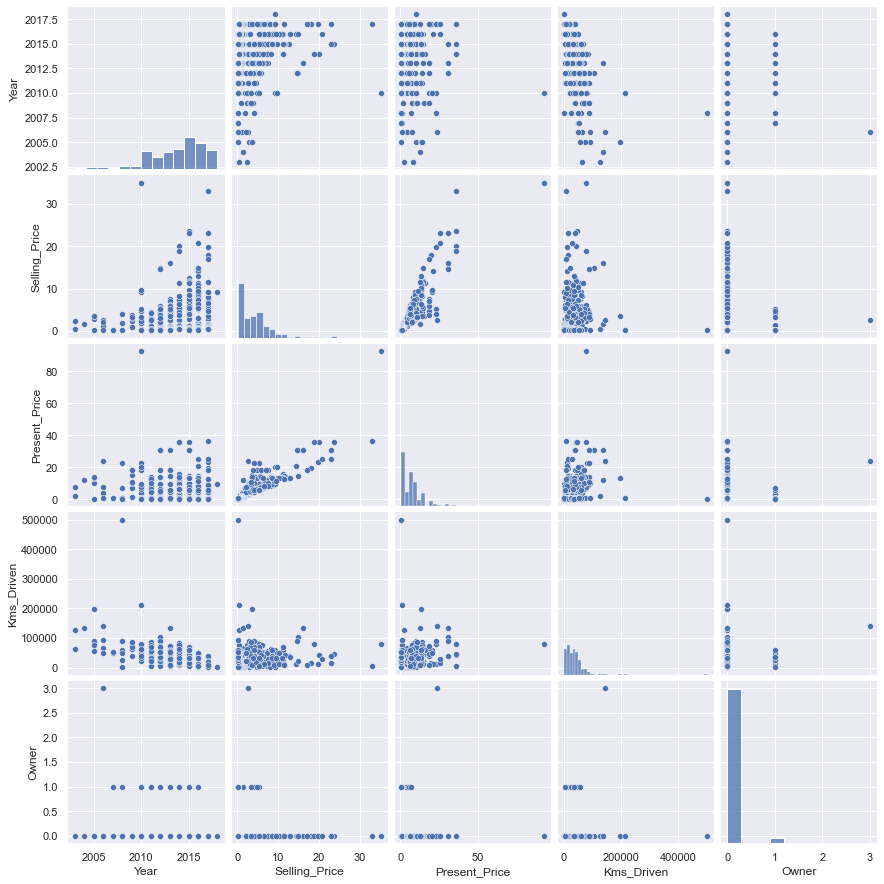

In [31]:
sns.pairplot(df2);

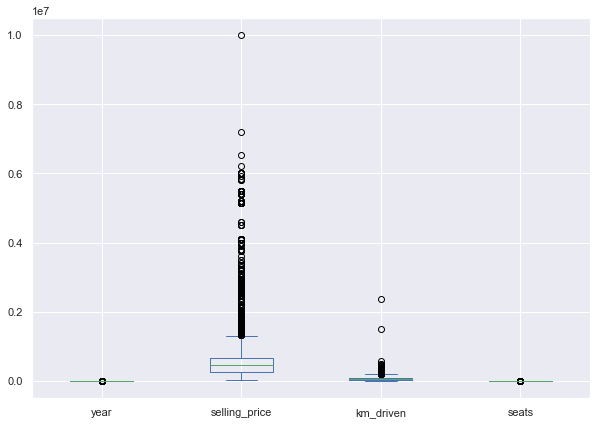

In [32]:
df.plot.box(figsize=(10,7));

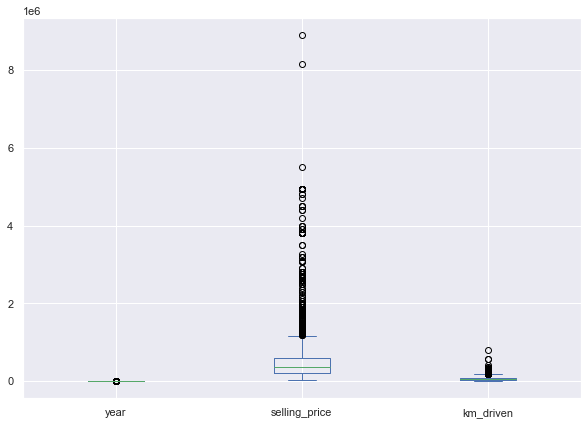

In [33]:
df1.plot.box(figsize=(10,7));

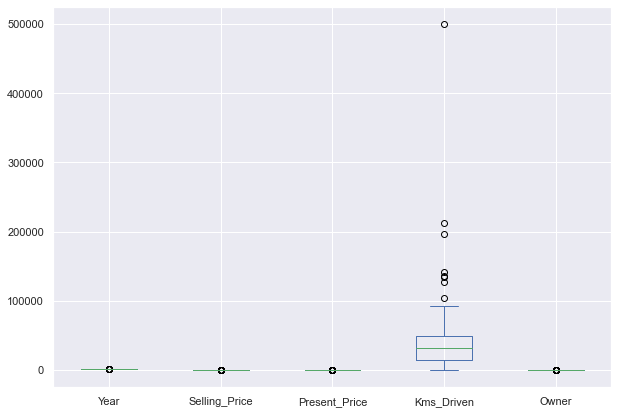

In [34]:
df2.plot.box(figsize=(10,7));

## DATA CLEANNING

### DROP VARIABLES

In [35]:
df.drop(['mileage', 'engine', 'max_power', 'torque','seats'],axis=1,inplace=True)
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner


In [36]:
df2.drop(['Present_Price'],axis=1,inplace=True)
df2.head()

,Car_Name,Year,Selling_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,42450,Diesel,Dealer,Manual,0


### CHANGE NAME OF COLUMNS

In [37]:
df2 = df2.rename(columns = {'Car_Name':'name','Year':'year','Selling_Price':'selling_price',
                            'Kms_Driven':'km_driven','Fuel_Type':'fuel','Seller_Type':'seller_type',
                            'Transmission':'transmission','Owner':'owner'}, inplace = False)
df2.columns

Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner'],
      dtype='object')

### RECODE VARIABLES

In [38]:
df2.loc[df2['owner'] == 0, 'owner'] = "First Owner"
df2.loc[df2['owner'] == 1, 'owner'] = "Second Owner"
df2.loc[df2['owner'] == 3, 'owner'] = "Fourth & Above Owner"
df2["owner"].head()

0    First Owner
1    First Owner
2    First Owner
3    First Owner
4    First Owner
Name: owner, dtype: object

### TRANSFORMING  SELLING PRICE VALUE

In [39]:
df2["selling_price"] = df2["selling_price"]*10e4
df2.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,ritz,2014,335000.0,27000,Petrol,Dealer,Manual,First Owner
1,sx4,2013,475000.0,43000,Diesel,Dealer,Manual,First Owner
2,ciaz,2017,725000.0,6900,Petrol,Dealer,Manual,First Owner
3,wagon r,2011,285000.0,5200,Petrol,Dealer,Manual,First Owner
4,swift,2014,460000.0,42450,Diesel,Dealer,Manual,First Owner


### MERGE DATAFRAMES

In [40]:
frames = [df, df1, df2]
dF = pd.concat(frames)
dF.shape

(12769, 8)

In [41]:
dF.describe()

,year,selling_price,km_driven
count,12769.000000,1.276900e+04,1.276900e+04
mean,2013.557444,5.886202e+05,6.781976e+04
std,4.093730,7.334376e+05,5.325725e+04
min,1983.000000,1.000000e+04,1.000000e+00
25%,2011.000000,2.390000e+05,3.400000e+04
50%,2014.000000,4.150000e+05,6.000000e+04
75%,2017.000000,6.500000e+05,9.000000e+04
max,2020.000000,1.000000e+07,2.360457e+06


In [42]:
# Revisamos los diferentes tipos y nombres de autos
dF["name"].value_counts()

Maruti Swift Dzire VDI                           198
Maruti Alto 800 LXI                              141
Maruti Alto LXi                                  118
Maruti Swift VDI BSIV                             88
Maruti Swift VDI                                  88
                                                ... 
Tata Sumo MKII CX BS IV                            1
Mahindra Scorpio 2009-2014 VLX 2WD 7S BSIV         1
Skoda Rapid 1.5 TDI Active                         1
Hyundai Verna Transform SX VGT CRDi AT BS III      1
Maruti Celerio X VXI Option BSIV                   1
Name: name, Length: 2609, dtype: int64

### DROP VARIABLE

In [43]:
dF.drop(["name"],axis=1,inplace=True)
dF.head()

,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,2014,450000.0,145500,Diesel,Individual,Manual,First Owner
1,2014,370000.0,120000,Diesel,Individual,Manual,Second Owner
2,2006,158000.0,140000,Petrol,Individual,Manual,Third Owner
3,2010,225000.0,127000,Diesel,Individual,Manual,First Owner
4,2007,130000.0,120000,Petrol,Individual,Manual,First Owner


### DATA PREPARATION

### NORMALIZE

In [44]:
from sklearn import preprocessing
# first variable
x1 = dF["selling_price"].values.reshape(-1,1)
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x1)
dF["selling_price"] = pd.DataFrame(x_scaled)

# second variable
x2 = dF["km_driven"].values.reshape(-1,1)
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x2)
dF["km_driven"] = pd.DataFrame(x_scaled)

In [45]:
dF.describe()

,year,selling_price,km_driven
count,12769.000000,12769.000000,12769.000000
mean,2013.557444,0.063445,0.029419
std,4.093730,0.082400,0.024687
min,1983.000000,0.002002,0.000000
25%,2011.000000,0.024524,0.014827
50%,2014.000000,0.044044,0.025418
75%,2017.000000,0.066567,0.041093
max,2020.000000,1.000000,1.000000


### CHANGE TYPE VARIABLE

In [46]:
dF["year"] = dF["year"].astype('object')
dF.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12769 entries, 0 to 300
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   year           12769 non-null  object 
 1   selling_price  12769 non-null  float64
 2   km_driven      12769 non-null  float64
 3   fuel           12769 non-null  object 
 4   seller_type    12769 non-null  object 
 5   transmission   12769 non-null  object 
 6   owner          12769 non-null  object 
dtypes: float64(2), object(5)
memory usage: 798.1+ KB


### DUMMIES

In [47]:
df_dummies = pd.get_dummies(dF)
df_dummies.head()

,selling_price,km_driven,year_1983,year_1991,year_1992,year_1994,year_1995,year_1996,year_1997,year_1998,...,seller_type_Dealer,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Automatic,transmission_Manual,owner_First Owner,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
0,0.044044,0.061640,0,0,0,0,0,0,0,0,...,0,1,0,0,1,1,0,0,0,0
1,0.036036,0.050837,0,0,0,0,0,0,0,0,...,0,1,0,0,1,0,0,1,0,0
2,0.014815,0.059310,0,0,0,0,0,0,0,0,...,0,1,0,0,1,0,0,0,0,1
3,0.021522,0.053803,0,0,0,0,0,0,0,0,...,0,1,0,0,1,1,0,0,0,0
4,0.012012,0.050837,0,0,0,0,0,0,0,0,...,0,1,0,0,1,1,0,0,0,0


### CORRELATION MATRIX

In [48]:
corMat = df_dummies.corr()

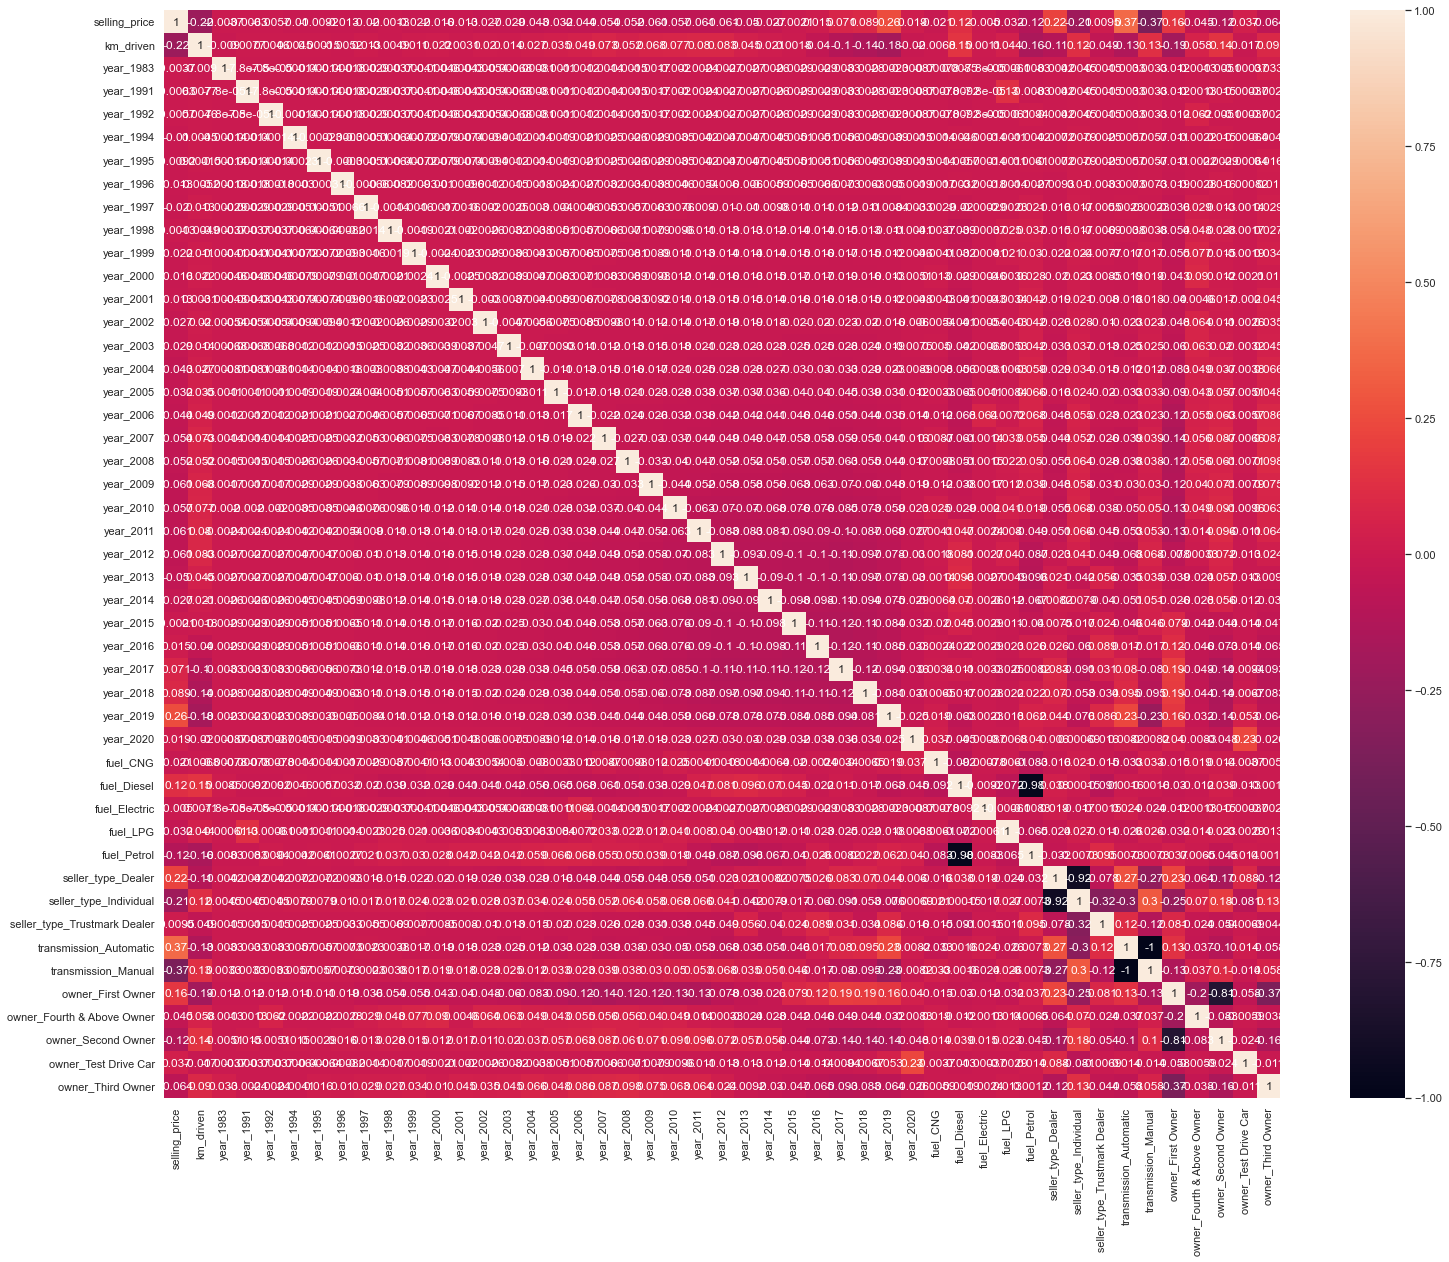

In [49]:
fig, ax = plt.subplots(figsize=(25,20)) 
sns.heatmap(corMat, annot=True,ax=ax)
plt.show()

In [50]:
corMat

,selling_price,km_driven,year_1983,year_1991,year_1992,year_1994,year_1995,year_1996,year_1997,year_1998,...,seller_type_Dealer,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Automatic,transmission_Manual,owner_First Owner,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
selling_price,1.000000,-0.219638,-0.003697,-0.006331,-0.005686,-0.010351,-0.009197,-0.012573,-0.019933,-0.001305,...,0.215633,-0.208537,0.009529,0.373174,-0.373174,0.156633,-0.045104,-0.123343,0.037127,-0.063538
km_driven,-0.219638,1.000000,-0.009028,0.007678,0.004641,0.004531,0.000147,-0.005177,0.013044,-0.004933,...,-0.108689,0.122598,-0.048995,-0.126416,0.126416,-0.193097,0.057725,0.141920,-0.017089,0.089970
year_1983,-0.003697,-0.009028,1.000000,-0.000078,-0.000078,-0.000136,-0.000136,-0.000175,-0.000293,-0.000368,...,-0.004165,0.004532,-0.001459,-0.003275,0.003275,-0.012295,-0.001266,-0.005140,-0.000368,0.032953
year_1991,-0.006331,0.007678,-0.000078,1.000000,-0.000078,-0.000136,-0.000136,-0.000175,-0.000293,-0.000368,...,-0.004165,0.004532,-0.001459,-0.003275,0.003275,-0.012295,-0.001266,0.015237,-0.000368,-0.002377
year_1992,-0.005686,0.004641,-0.000078,-0.000078,1.000000,-0.000136,-0.000136,-0.000175,-0.000293,-0.000368,...,-0.004165,0.004532,-0.001459,-0.003275,0.003275,-0.012295,0.061873,-0.005140,-0.000368,-0.002377
year_1994,-0.010351,0.004531,-0.000136,-0.000136,-0.000136,1.000000,-0.000235,-0.000303,-0.000508,-0.000637,...,-0.007214,0.007851,-0.002528,-0.005673,0.005673,-0.010520,-0.002193,0.014628,-0.000637,-0.004117
year_1995,-0.009197,0.000147,-0.000136,-0.000136,-0.000136,-0.000235,1.000000,-0.000303,-0.000508,-0.000637,...,-0.007214,0.007851,-0.002528,-0.005673,0.005673,-0.010520,-0.002193,0.002862,-0.000637,0.016282
year_1996,-0.012573,-0.005177,-0.000175,-0.000175,-0.000175,-0.000303,-0.000303,1.000000,-0.000656,-0.000822,...,-0.009314,0.010136,-0.003264,-0.007324,0.007324,-0.019148,-0.002831,0.015848,-0.000822,0.010487
year_1997,-0.019933,0.013044,-0.000293,-0.000293,-0.000293,-0.000508,-0.000508,-0.000656,1.000000,-0.001376,...,-0.015590,0.016966,-0.005463,0.002281,-0.002281,-0.036044,0.029027,0.013450,-0.001376,0.028891
year_1998,-0.001305,-0.004933,-0.000368,-0.000368,-0.000368,-0.000637,-0.000637,-0.000822,-0.001376,1.000000,...,-0.014648,0.016621,-0.006850,-0.003770,0.003770,-0.053732,0.047947,0.028047,-0.001726,0.026536


## EXCLUSION METHOD

In [51]:
X = df_dummies.drop("selling_price",axis=1)
y = df_dummies["selling_price"]

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=0)

## BEST VARIABLES

### FIRST METHOD

In [55]:
# Usar f_classif y SelectPercentile para escoger el 10% de las variables
select1 = SelectPercentile(percentile=10)
select1.fit(X_train,y_train)
# Transformar el dataset de entrenamiento
X_train_selected1 = select1.transform(X_train)

In [56]:
X_train.shape

(10215, 46)

In [57]:
X_train_selected1.shape

(10215, 5)

[False False False False False False  True False False False False False
 False False False False False False False False False False False False
 False False False False False  True False False False False False False
 False False False  True  True False False False  True False]


([], [])

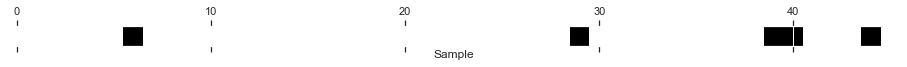

In [58]:
# Máscara para saber qué variables escogió
mask = select1.get_support()
print(mask)

# Visualizar la máscara -- negro es verdad, blanco es falso
plt.matshow(mask.reshape(1,-1), cmap="gray_r")
plt.xlabel("Sample")
plt.yticks(())

### SECOND METHOD

#### LINEAR REGRESSION

In [59]:
select2 = SelectFromModel(LinearRegression(), 
                         threshold="median")

In [60]:
select2.fit(X_train,y_train)
# Transformar el dataset de entrenamiento
X_train_selected2 = select2.transform(X_train)

In [61]:
X_train.shape

(10215, 46)

In [62]:
X_train_selected2.shape

(10215, 23)

[False False False False False False False False  True  True False  True
  True False False  True  True  True  True False  True  True  True False
  True  True  True  True  True  True  True False False False False False
  True  True  True  True  True False False False False False]


([], [])

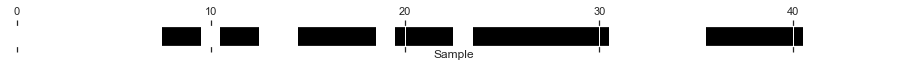

In [63]:
# Máscara para saber qué variables escogió
mask = select2.get_support()
print(mask)

# Visualizar la máscara -- negro es verdad, blanco es falso
plt.matshow(mask.reshape(1,-1), cmap="gray_r")
plt.xlabel("Sample")
plt.yticks(())

#### RIDGE

In [64]:
select3 = SelectFromModel(Ridge(), 
                         threshold="median")

In [65]:
select3.fit(X_train,y_train)
# Transformar el dataset de entrenamiento
X_train_selected3 = select3.transform(X_train)

In [66]:
X_train.shape

(10215, 46)

In [67]:
X_train_selected3.shape

(10215, 23)

[ True  True False False  True  True  True  True  True False  True  True
 False  True  True False False False False False False False False False
 False False  True  True  True  True  True False  True  True False False
  True False  True  True  True False False False  True False]


([], [])

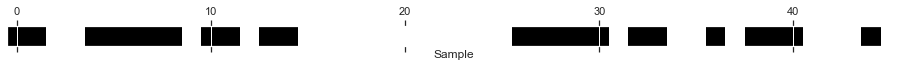

In [68]:
# Máscara para saber qué variables escogió
mask = select3.get_support()
print(mask)

# Visualizar la máscara -- negro es verdad, blanco es falso
plt.matshow(mask.reshape(1,-1), cmap="gray_r")
plt.xlabel("Sample")
plt.yticks(())

#### LASSO

In [78]:
select4 = SelectFromModel(Lasso(), 
                         threshold="median")

In [79]:
select4.fit(X_train,y_train)
# Transformar el dataset de entrenamiento
X_train_selected4 = select4.transform(X_train)

In [80]:
X_train.shape

(10215, 46)

In [81]:
X_train_selected4.shape

(10215, 46)

[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True]


([], [])

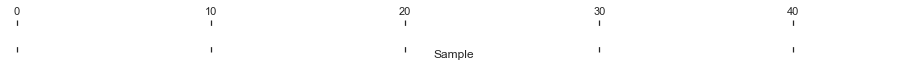

In [82]:
# Máscara para saber qué variables escogió
mask = select4.get_support()
print(mask)

# Visualizar la máscara -- negro es verdad, blanco es falso
plt.matshow(mask.reshape(1,-1), cmap="gray_r")
plt.xlabel("Sample")
plt.yticks(())

## MODELING

### LINEAR REGRESSION ALL VARIABLES

In [83]:
lr = LinearRegression()
lr.fit(X_train,y_train)
y_prediction =  lr.predict(X_test)

In [84]:
score = r2_score(y_test,y_prediction)
print("El valor de la r^2 es",score.round(4))
print ("El error medio absoluto es",mean_absolute_error(y_test, y_prediction).round(4))
print("El error medio cuadrado es",mean_squared_error(y_test,y_prediction).round(4))
print("La raíz cuadrada del error cuadrado medio es",np.sqrt(mean_squared_error(y_test,y_prediction)).round(4))

El valor de la r^2 es 0.1407
El error medio absoluto es 0.0393
El error medio cuadrado es 0.0054
La raíz cuadrada del error cuadrado medio es 0.0733


### LINEAR REGRESSION WITH 10% OF VARIABLES

In [85]:
X_test_selected1 = select1.transform(X_test)
lr1 = LinearRegression()
lr1.fit(X_train_selected1,y_train)
y_prediction1 =  lr1.predict(X_test_selected1)

In [86]:
score = r2_score(y_test,y_prediction1)
print("El valor de la r^2 es",score.round(4))
print ("El error medio absoluto es",mean_absolute_error(y_test, y_prediction1).round(4))
print("El error medio cuadrado es",mean_squared_error(y_test,y_prediction1).round(4))
print("La raíz cuadrada del error cuadrado medio es",np.sqrt(mean_squared_error(y_test,y_prediction1)).round(4))

El valor de la r^2 es 0.0807
El error medio absoluto es 0.0416
El error medio cuadrado es 0.0057
La raíz cuadrada del error cuadrado medio es 0.0758


### LINEAR REGRESSION WITH 23 VARIABLES

In [112]:
X_test_selected2 = select2.transform(X_test)
lr2 = LinearRegression()
lr2.fit(X_train_selected2,y_train)
y_prediction2 =  lr2.predict(X_test_selected2)

In [113]:
score = r2_score(y_test,y_prediction2)
print("El valor de la r^2 es",score.round(4))
print ("El error medio absoluto es",mean_absolute_error(y_test, y_prediction2).round(4))
print("El error medio cuadrado es",mean_squared_error(y_test,y_prediction2).round(4))
print("La raíz cuadrada del error cuadrado medio es",np.sqrt(mean_squared_error(y_test,y_prediction2)).round(4))

El valor de la r^2 es 0.106
El error medio absoluto es 0.0402
El error medio cuadrado es 0.0056
La raíz cuadrada del error cuadrado medio es 0.0747


### RIDGE REGRESSION WITH 23 VARIABLES

In [87]:
X_test_selected3 = select3.transform(X_test)
lr3 = Ridge(alpha=0.01)
lr3.fit(X_train_selected3,y_train)
y_prediction3 =  lr3.predict(X_test_selected3)

In [88]:
score = r2_score(y_test,y_prediction3)
print("El valor de la r^2 es",score.round(4))
print ("El error medio absoluto es",mean_absolute_error(y_test, y_prediction3).round(4))
print("El error medio cuadrado es",mean_squared_error(y_test,y_prediction3).round(4))
print("La raíz cuadrada del error cuadrado medio es",np.sqrt(mean_squared_error(y_test,y_prediction3)).round(4))

El valor de la r^2 es 0.1387
El error medio absoluto es 0.0395
El error medio cuadrado es 0.0054
La raíz cuadrada del error cuadrado medio es 0.0734


In [89]:
param_grid = {"alpha": [0.001,0.01,0.1,1,10,100]}

In [90]:
gs = GridSearchCV(Ridge(), param_grid, cv=10)

In [91]:
gs.fit(X_train_selected3,y_train)

GridSearchCV(cv=10, estimator=Ridge(),
             param_grid={'alpha': [0.001, 0.01, 0.1, 1, 10, 100]})

In [92]:
gs.score(X_test_selected3,y_prediction3)

0.9983642588387496

In [93]:
gs.best_params_

{'alpha': 1}

In [94]:
gs.best_estimator_

Ridge(alpha=1)

In [95]:
results =pd.DataFrame(gs.cv_results_)[["param_alpha","mean_test_score",
                             "std_test_score"]]
results

,param_alpha,mean_test_score,std_test_score
0,0.001,0.246017,0.038078
1,0.01,0.246066,0.037970
2,0.1,0.246526,0.036983
3,1,0.249076,0.032725
4,10,0.245674,0.036689
5,100,0.236044,0.037594


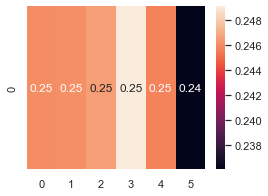

In [96]:
#mglearn.plots.plot_threefold_split()
scores = np.array(results.mean_test_score).reshape(1,6)
fig, ax = plt.subplots(figsize=(4,3)) 
sns.heatmap(scores, annot=True,ax=ax)
plt.show()

#mglearn.tools.heatmap(scores, xlabel="gamma",
 #                     xticklabels=param_grid["alpha"],
  #                    cmap="viridis")

In [98]:
X_test_selected3 = select3.transform(X_test)
lr3 = Ridge(alpha=1)
lr3.fit(X_train_selected3,y_train)
y_prediction3 =  lr3.predict(X_test_selected3)

In [99]:
score = r2_score(y_test,y_prediction3)
print("El valor de la r^2 es",score.round(4))
print ("El error medio absoluto es",mean_absolute_error(y_test, y_prediction3).round(4))
print("El error medio cuadrado es",mean_squared_error(y_test,y_prediction3).round(4))
print("La raíz cuadrada del error cuadrado medio es",np.sqrt(mean_squared_error(y_test,y_prediction3)).round(4))

El valor de la r^2 es 0.1373
El error medio absoluto es 0.0394
El error medio cuadrado es 0.0054
La raíz cuadrada del error cuadrado medio es 0.0734


### LASSO REGRESSION WITH 46 VARIABLES

In [100]:
X_test_selected4 = select4.transform(X_test)
lr4 = Lasso(alpha=0.01)
lr4.fit(X_train_selected4,y_train)
y_prediction4 =  lr4.predict(X_test_selected4)

In [101]:
score = r2_score(y_test,y_prediction4)
print("El valor de la r^2 es",score.round(4))
print ("El error medio absoluto es",mean_absolute_error(y_test, y_prediction4).round(4))
print("El error medio cuadrado es",mean_squared_error(y_test,y_prediction4).round(4))
print("La raíz cuadrada del error cuadrado medio es",np.sqrt(mean_squared_error(y_test,y_prediction4)).round(4))

El valor de la r^2 es 0.0122
El error medio absoluto es 0.0423
El error medio cuadrado es 0.0062
La raíz cuadrada del error cuadrado medio es 0.0786


In [102]:
param_grid = {"alpha": [0.001,0.01,0.1,1,10,100]}

In [103]:
gs = GridSearchCV(Lasso(), param_grid, cv=10)

In [104]:
gs.fit(X_train_selected4,y_train)

GridSearchCV(cv=10, estimator=Lasso(),
             param_grid={'alpha': [0.001, 0.01, 0.1, 1, 10, 100]})

In [105]:
gs.score(X_test_selected4,y_prediction4)

-375.59527863785917

In [106]:
gs.best_params_

{'alpha': 0.001}

In [107]:
gs.best_estimator_

Lasso(alpha=0.001)

In [108]:
results =pd.DataFrame(gs.cv_results_)[["param_alpha","mean_test_score",
                             "std_test_score"]]
results

,param_alpha,mean_test_score,std_test_score
0,0.001,0.225296,0.034651
1,0.01,0.013398,0.002403
2,0.1,-0.001347,0.001271
3,1,-0.001347,0.001271
4,10,-0.001347,0.001271
5,100,-0.001347,0.001271


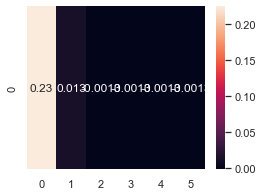

In [109]:
#mglearn.plots.plot_threefold_split()
scores = np.array(results.mean_test_score).reshape(1,6)
fig, ax = plt.subplots(figsize=(4,3)) 
sns.heatmap(scores, annot=True,ax=ax)
plt.show()

#mglearn.tools.heatmap(scores, xlabel="gamma",
 #                     xticklabels=param_grid["alpha"],
  #                    cmap="viridis")

In [110]:
X_test_selected4 = select4.transform(X_test)
lr4 = Lasso(alpha=0.001)
lr4.fit(X_train_selected4,y_train)
y_prediction4 =  lr4.predict(X_test_selected4)

In [111]:
score = r2_score(y_test,y_prediction4)
print("El valor de la r^2 es",score.round(4))
print ("El error medio absoluto es",mean_absolute_error(y_test, y_prediction4).round(4))
print("El error medio cuadrado es",mean_squared_error(y_test,y_prediction4).round(4))
print("La raíz cuadrada del error cuadrado medio es",np.sqrt(mean_squared_error(y_test,y_prediction4)).round(4))

El valor de la r^2 es 0.1234
El error medio absoluto es 0.0397
El error medio cuadrado es 0.0055
La raíz cuadrada del error cuadrado medio es 0.074
